### Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load and Review Data

In [7]:
pl_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [8]:
pl_data.shape # Check number of columns and rows in data frame

(5000, 14)

In [9]:
pl_data.head() # Check first 5 rows of data set

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
pl_data.isnull().values.any() # If there are any null values in data set

False

In [11]:
pl_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
# Experience shows a negative value. Must be an error. As minimum value for Experience is 0
#print(pl_data[pl_data['Experience'] < 0][['Age', 'Education','Experience']])
# Examining age & Education parameters shows that people whose experience are marked as  negative's  are below 30... 
# Hence, its possible that some members joined jobs later in the years.. We ignore and mark it as 0

In [13]:

neg_exp_list = pl_data[pl_data['Experience'] < 0]['ID'].tolist()
for id in neg_exp_list:
    pl_data.loc[pl_data.loc[np.where(pl_data['ID']==id)].index, 'Experience'] = 0


In [14]:
pl_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [15]:
# Min value of Experience is corrected.

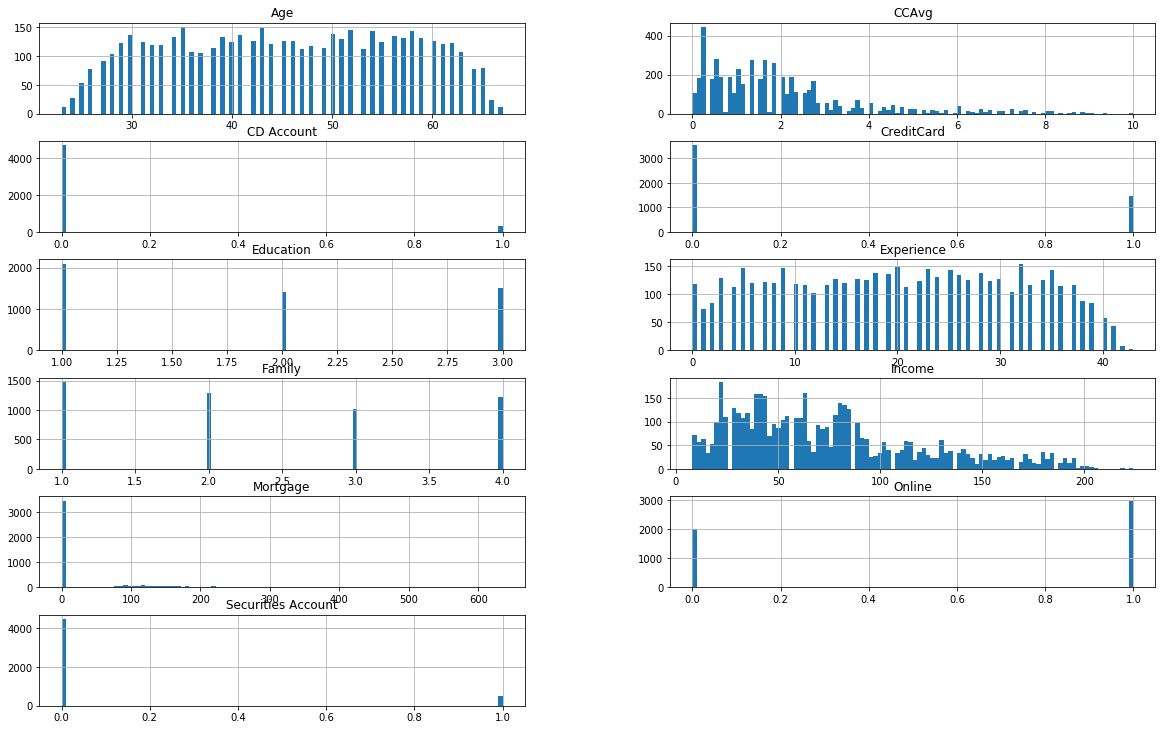

In [16]:
columns = list(pl_data.columns[~pl_data.columns.isin(['Personal Loan', 'ID', 'ZIP Code'])])
pl_data[columns].hist(stacked=False, bins=100, figsize=(20,30), layout=(14,2)); 

In [ ]:
# Age shows fairly even distribution considered in this sample with minumum age is 23 and max 67
# Age and Experience is co-related as expected
# Income is also co-related to Credit Card Average

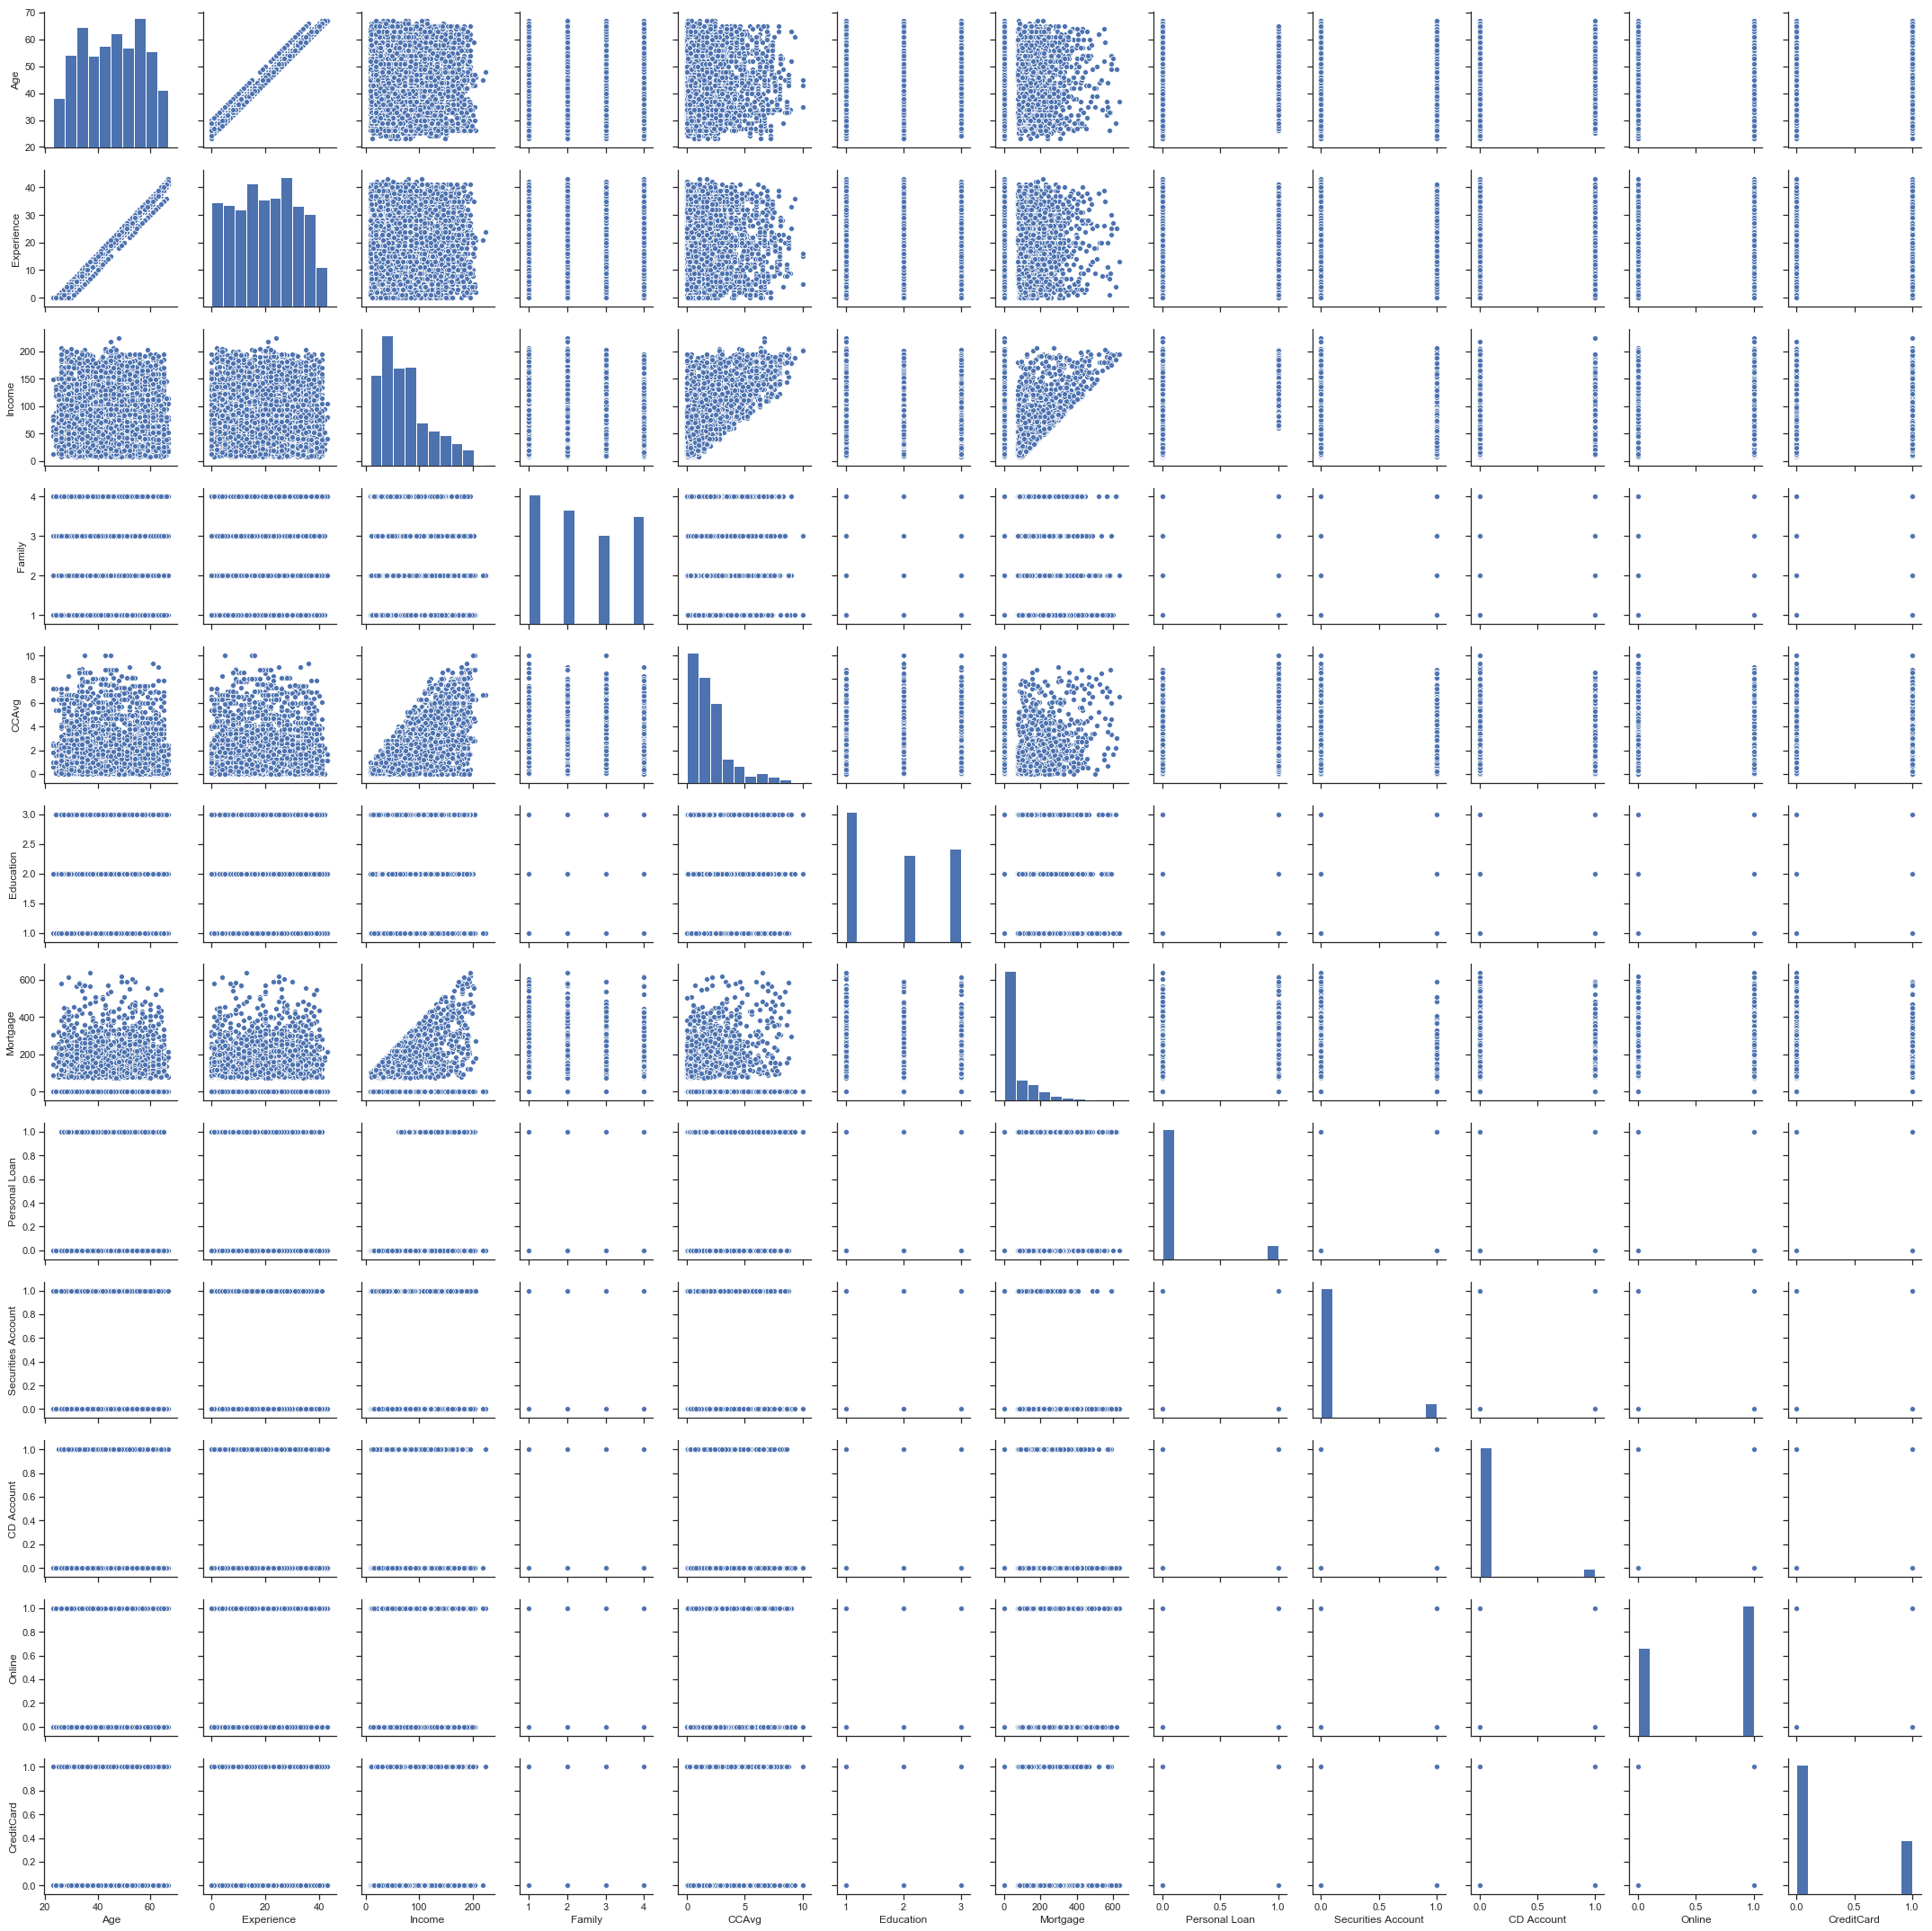

In [17]:
sns.set(style="ticks")
sns.pairplot(pl_data.drop(["ID","ZIP Code"], axis=1))

### As expected Age and Experience are linearly co-related

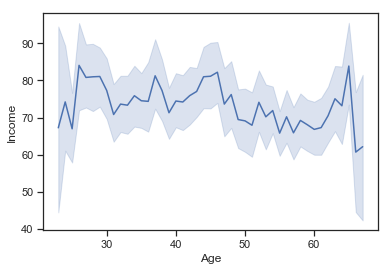

In [18]:
sns.lineplot(x="Age", y="Income", data=pl_data)

### No co-relation to Age and Income

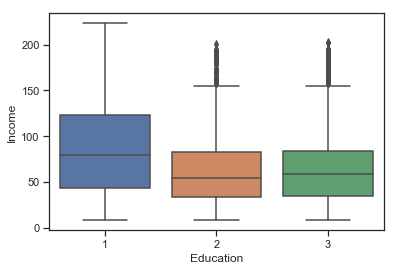

In [19]:
sns.boxplot(x="Education", y="Income", data=pl_data)

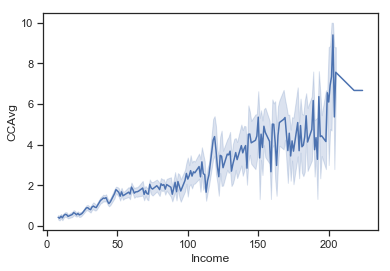

In [20]:
sns.lineplot(x="Income", y="CCAvg", data=pl_data)

### Income and Credit Card Average shows good co-relation

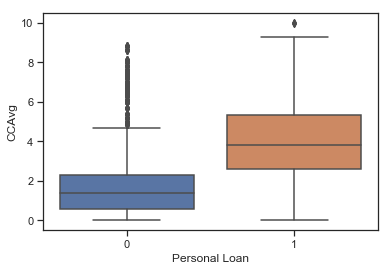

In [21]:
sns.boxplot(x="Personal Loan", y="CCAvg", data=pl_data)

In [13]:
### People with Higher Credit Card Aveage in general also have Personal Loans

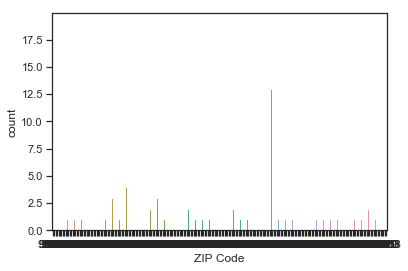

In [22]:
sns.countplot(x="ZIP Code", data=pl_data[pl_data['Personal Loan']==1])

In [ ]:
### No clustering of Zipcodes where all Personal Loans are concentrated...

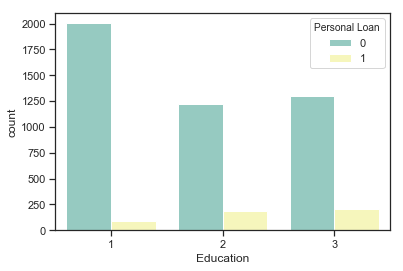

In [23]:
sns.countplot(x="Education", hue="Personal Loan", data=pl_data, palette="Set3")

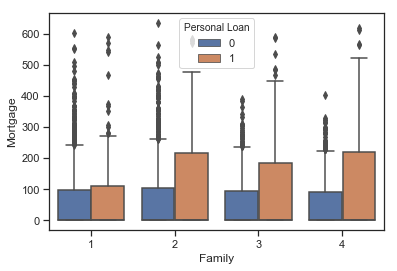

In [24]:
sns.boxplot(x="Family", y='Mortgage', hue="Personal Loan", data=pl_data)

In [23]:
# Larger Families tend to have higher Instances of personal Loan

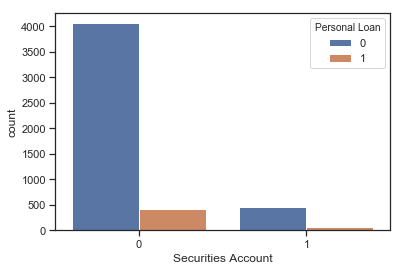

In [25]:
sns.countplot(x='Securities Account', hue='Personal Loan', data=pl_data)

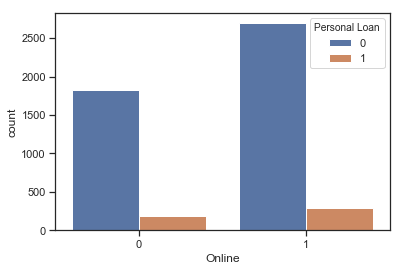

In [26]:
sns.countplot(x="Online", data=pl_data,hue="Personal Loan")

In [27]:
# Many are Online now and relatively they also have chance of taking Personal Loan as compared to those that are not online

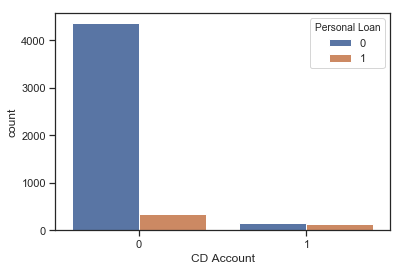

In [26]:
sns.countplot(x="CD Account", data=pl_data,hue="Personal Loan")

In [28]:
#Inference is those who have a  CD Account may also take a personal Loan

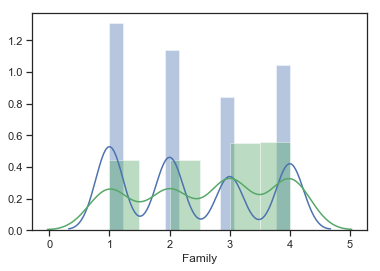

In [27]:
no_pl = pl_data[pl_data['Personal Loan']==0]
yes_pl = pl_data[pl_data['Personal Loan']==1]
sns.distplot( no_pl['Family'], color = 'b')
sns.distplot( yes_pl['Family'], color = 'g')

In [30]:
#While there is no major distinction, higher family sizes defintely have more chances of personal loan

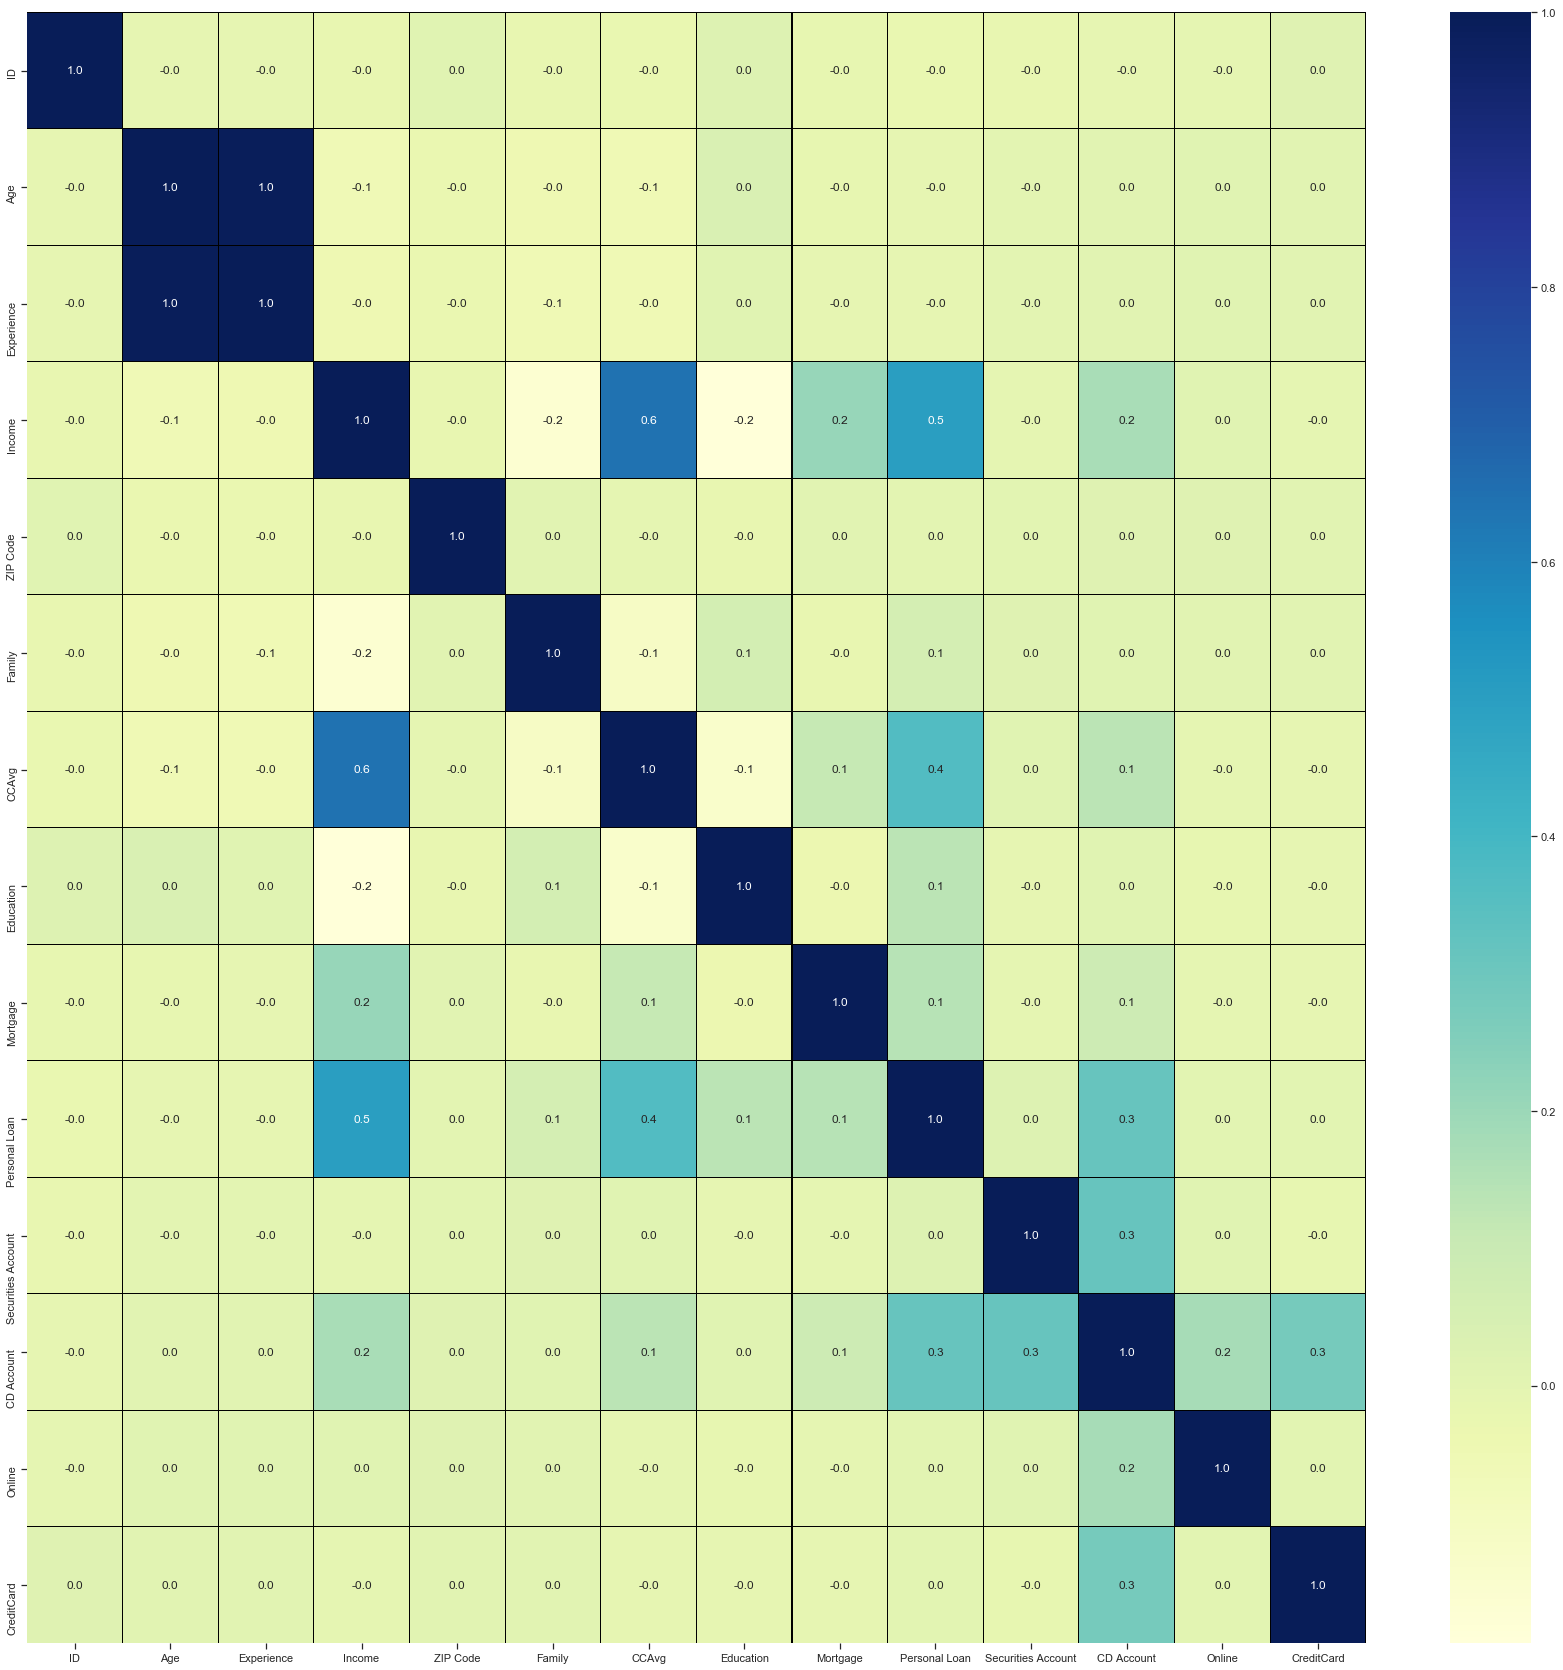

In [28]:
plt.figure(figsize=(30, 30))
sns.heatmap(pl_data.corr(),  fmt='.1f', annot=True, linecolor='black', linewidths=0.05, cmap="YlGnBu")

In [29]:
n_true = len(pl_data.loc[pl_data['Personal Loan'] == True])
n_false = len(pl_data.loc[pl_data['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


### Approximately 10% take personal Loan

### Spliting the data

# We will use 70% of data for training and 30% for testing.

In [30]:
from sklearn.model_selection import train_test_split

X = pl_data.drop(['Personal Loan', 'ID','ZIP Code'],axis=1)     
# Dropping ID, Zipcode as its a categoric variable
# Dropping Experience as its highly co-related with Age
Y = pl_data['Personal Loan'] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [27]:
# Now lets check personal loan True/False ratio in split data

In [31]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(pl_data.loc[pl_data['Personal Loan'] == 1]), (len(pl_data.loc[pl_data['Personal Loan'] == 1])/len(pl_data.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(pl_data.loc[pl_data['Personal Loan'] == 0]), (len(pl_data.loc[pl_data['Personal Loan'] == 0])/len(pl_data.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



### Scale the data points using MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

e:\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
e:\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Logistic Regression

In [33]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train_scaled, y_train)
#predict on test
y_predict = model.predict(X_test_scaled)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.401962  0.161905  7.631338  1.357188  1.786939  2.297925  0.453222   

          7         8         9        10  intercept  
0 -0.947549  3.089184 -0.559746 -0.972223    -7.4376  


In [34]:
model_score = model.score(X_test_scaled, y_test)
print(model_score)

0.944


### 94% Accuracy seems decent with Logistic Regression!

          Predict 1  Predict 0
Actual 1         90         59
Actual 0         25       1326


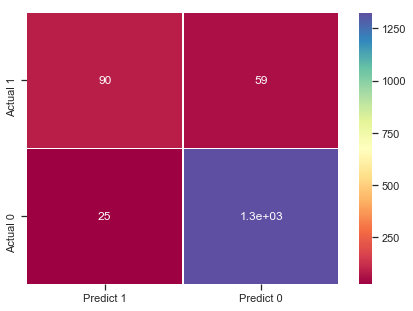

In [35]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap="Spectral", linecolor='white', linewidths=0.5)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.78      0.60      0.68       149

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.87      0.79      0.83      1500
weighted avg       0.94      0.94      0.94      1500



### Accuracy is good, with good precision, but recall is not good, so Logistic Regression results are average! 

### KNN Model

In [37]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
y_pred = knn.predict(X_test_scaled)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))


# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
y_pred = knn.predict(X_test_scaled)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
y_pred = knn.predict(X_test_scaled)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
y_pred = knn.predict(X_test_scaled)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))







0.96
0.9586666666666667
0.9586666666666667
0.948


In [38]:


# creating odd list of K for KNN
neighbors = list(range(1,20, 2))


In [39]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


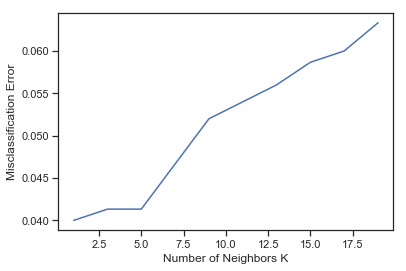

In [40]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

0.96
   Predict 1  Predict 0
1        112         37
0         23       1328


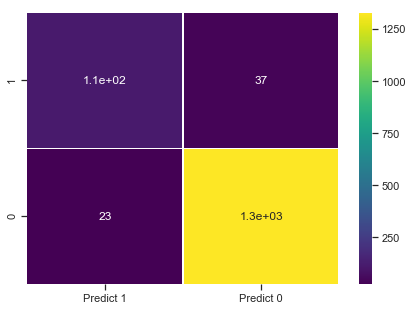

In [41]:
# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors=1)

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
y_pred = knn.predict(X_test_scaled)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap="viridis", linecolor='white', linewidths=0.5)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1351
           1       0.83      0.75      0.79       149

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.90      0.87      0.88      1500
weighted avg       0.96      0.96      0.96      1500



### KNN model has good accuracy and better precision and recall than logistic regression. So Overall is better than logistic regression

### Train Naive Bayes algorithm

In [43]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
pl_model = GaussianNB()

pl_model.fit(X_train_scaled, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance of our model with training data

In [44]:
pl_train_predict = pl_model.predict(X_train_scaled)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, pl_train_predict)))
print()

Model Accuracy: 0.8900



### Performance of our model with test data

In [45]:
pl_test_predict = pl_model.predict(X_test_scaled)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, pl_test_predict)))
print()

Model Accuracy: 0.8747



### Accuracy of Naive Bayes is not so great!

Confusion Matrix
   Predict 1  Predict 0
1         92         57
0        131       1220


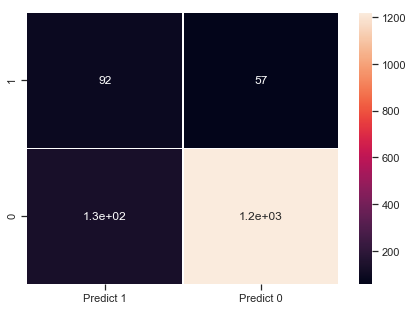

In [46]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pl_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, linecolor='white', linewidths=0.5)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1351
           1       0.83      0.75      0.79       149

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.90      0.87      0.88      1500
weighted avg       0.96      0.96      0.96      1500



### Accuracy in Naive Bayes not as good as other two, but it has better recall and precision than logistic regression. Overall KNN is better among the three

#### Trying with SVM

In [48]:
from sklearn import svm
from sklearn.svm import SVC

In [49]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

e:\ANACONDA\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.96
Accuracy on test set: 0.96


### Try improving the model accuracy using C=1000

In [50]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

e:\ANACONDA\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.992
Accuracy on test set: 0.982


### Accuracy BEST with SVM

In [51]:
y_pred = svc.predict(X_test_scaled)

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.982


Confusion Matrix
   Predict 1  Predict 0
1        133         16
0         11       1340


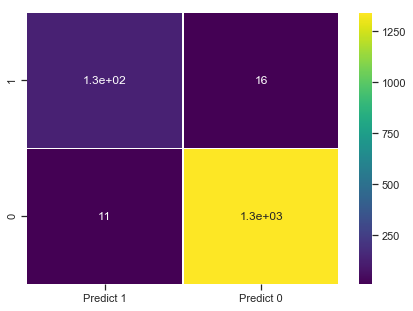

In [52]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='viridis', linecolor='white', linewidths=0.5)

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.92      0.89      0.91       149

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



### Overall best Model is SVM for this example having high accuracy, precision and recall and f1-score